Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/dataset"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## make a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names

num_classes = len(train_ds.class_names)

print(class_names, num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

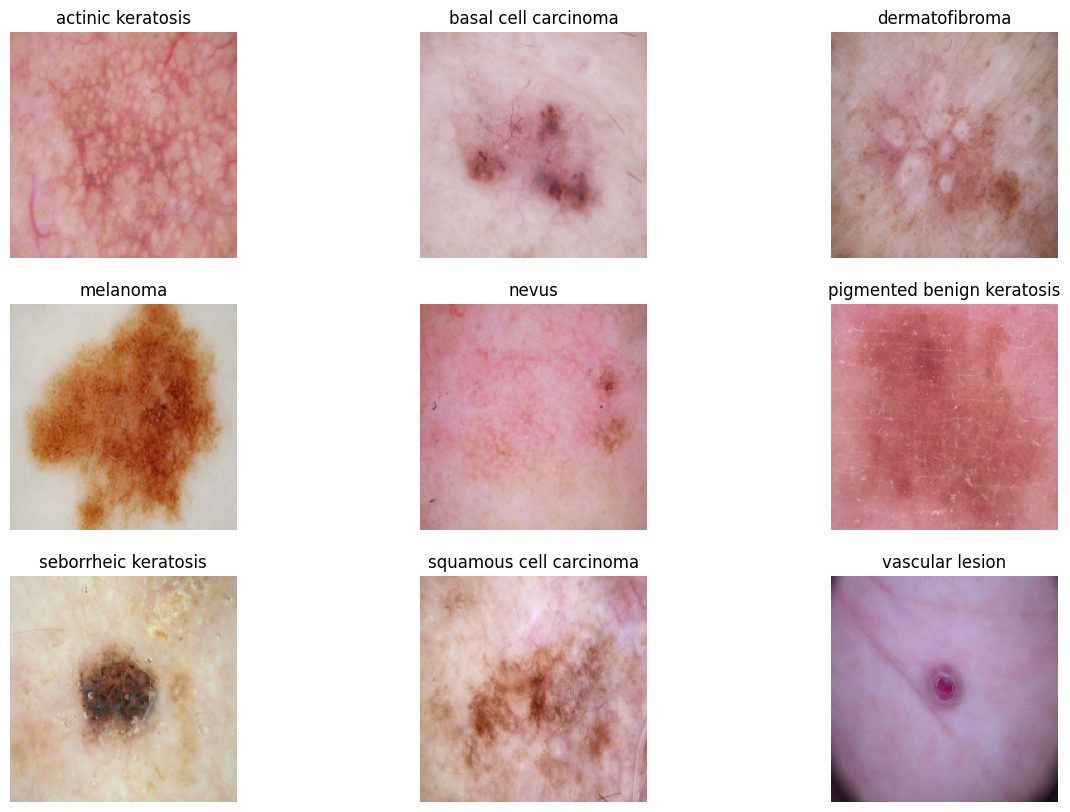

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Function to display one image per class
def visualize_classes(dataset, class_names):
    plt.figure(figsize=(15, 10))
    images_per_class = {class_name: None for class_name in class_names}

    for images, labels in dataset:
        for i, class_name in enumerate(class_names):
            if images_per_class[class_name] is None:
                idx = np.where(labels == i)[0]
                if len(idx) > 0:
                    images_per_class[class_name] = images[idx[0]].numpy().astype("uint8")
        if all(image is not None for image in images_per_class.values()):
            break

    for i, (class_name, image) in enumerate(images_per_class.items()):
        plt.subplot(3, 3, i + 1)
        if image is not None:
            plt.imshow(image)
            plt.title(class_name)
            plt.axis("off")
        else:
            plt.text(0.5, 0.5, 'No image found', horizontalalignment='center', verticalalignment='center')
            plt.title(class_name)
            plt.axis("off")

    plt.show()


# Visualize the classes
i=0
visualize_classes(train_ds, class_names)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [12]:
# Configure the datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
# Get the number of classes from the dataset

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 22s 111ms/step - loss: 1.9942 - accuracy: 0.2857 - val_loss: 1.7237 - val_accuracy: 0.3714
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 1.6640 - accuracy: 0.4074 - val_loss: 1.6787 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.5675 - accuracy: 0.4420 - val_loss: 1.6288 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4885 - accuracy: 0.4688 - val_loss: 1.5404 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4416 - accuracy: 0.4922 - val_loss: 1.5080 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3295 - accuracy: 0.5268 - val_loss: 1.4369 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 1.2583 - accuracy: 0.5592 - val_loss: 1.4159 - val_accuracy: 0.4989
Epoch 8/20


### Visualizing training results

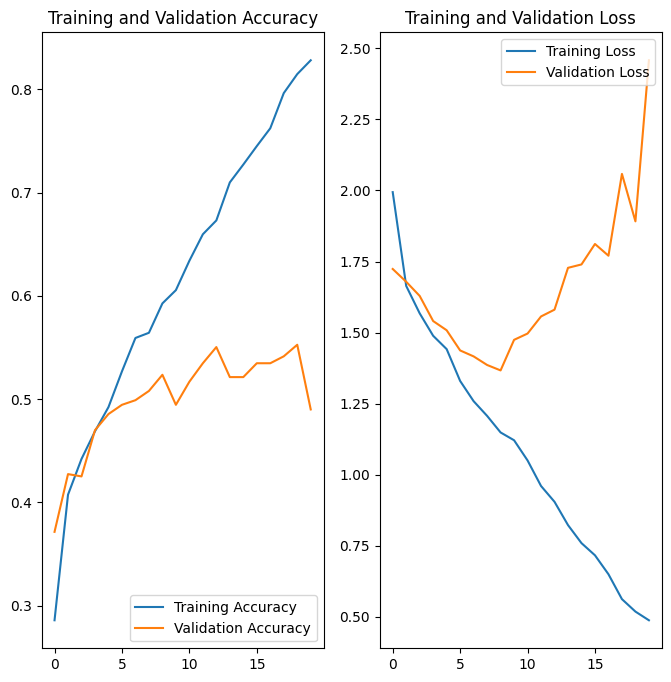

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
print("Training Loss: ", acc)
print("Validation Loss: ", val_acc)
print("Training Loss: ", loss)
print("Validation Loss: ", val_loss)

Training Loss:  [0.2857142984867096, 0.4073660671710968, 0.4419642984867096, 0.46875, 0.4921875, 0.5267857313156128, 0.5591517686843872, 0.5641741156578064, 0.5926339030265808, 0.60546875, 0.6339285969734192, 0.6595982313156128, 0.6729910969734192, 0.7098214030265808, 0.7271205186843872, 0.7449776530265808, 0.7622767686843872, 0.7963169813156128, 0.8147321343421936, 0.828125]
Validation Loss:  [0.37136465311050415, 0.427293062210083, 0.42505592107772827, 0.46979865431785583, 0.4854586124420166, 0.49440714716911316, 0.49888142943382263, 0.5078299641609192, 0.5234899520874023, 0.49440714716911316, 0.5167785286903381, 0.5346755981445312, 0.5503355860710144, 0.5212528109550476, 0.5212528109550476, 0.5346755981445312, 0.5346755981445312, 0.5413870215415955, 0.5525727272033691, 0.4899328947067261]
Training Loss:  [1.9942095279693604, 1.6640430688858032, 1.5675163269042969, 1.4884774684906006, 1.4415818452835083, 1.3295376300811768, 1.2582682371139526, 1.2065261602401733, 1.1481987237930298, 

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The model shows clear signs of overfitting. Here's a detailed analysis:

# Evidence of Overfitting:
### 1. Training Accuracy and Loss:

- Accuracy steadily improves, reaching up to 82.81%.
- Loss consistently decreases, reaching down to 0.49.
- This indicates that the model is learning the training data well and improving with each epoch.

### 2. Validation Accuracy and Loss:

- Accuracy shows minor improvements initially but then stagnates and fluctuates, ending at 48.99%.
- Loss decreases slightly at first but then starts to increase, ending significantly higher at 2.46.
- This suggests that while the model is getting better at fitting the training data, it is not generalizing well to unseen validation data.

# Detailed Findings:
### - Training Metrics:

- The steady improvement in training accuracy and decrease in training loss indicates the model is learning the patterns within the training data effectively.
- Training Accuracy Progression: Starts at 28.57% and improves to 82.81%.
- Training Loss Progression: Starts at 1.99 and decreases to 0.49.

### - Validation Metrics:

- Initial improvements in validation accuracy and decreases in loss show the model starts learning useful features.
- As epochs increase, the validation accuracy stabilizes and does not show significant improvement, while the validation loss starts to increase, indicating that the model is starting to memorize the training data and fail to generalize.
- Validation Accuracy Progression: Starts at 37.14%, peaks around 55.25%, then fluctuates and ends at 48.99%.
- Validation Loss Progression: Starts at 1.72, decreases to around 1.36, then increases to 2.46.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/dataset"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## make a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names

num_classes = len(train_ds.class_names)

print(class_names, num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 9


In [10]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# Let's add Data augmentation layer - Data augmentation artificially expands the training dataset by creating modified versions of images. It helps in:
# Reducing Overfitting: By making the model less sensitive to small variations in the input images.
# Improving Generalization: By exposing the model to a wider range of possible image variations.
# Enhancing Robustness: By training the model to recognize objects regardless of orientation, position, and scale.

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])


In [ ]:
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [11]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# Build the CNN model with dropout and data augmentation
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Compiling the model

In [12]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [14]:
## Your code goes here, note: train your model for 20 epochs

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

epochs = 20

history = model.fit( ## your training code
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)



Epoch 1/20
56/56 [==============================] - 23s 235ms/step - loss: 2.0625 - accuracy: 0.2388 - val_loss: 1.8553 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 15s 241ms/step - loss: 1.8140 - accuracy: 0.3315 - val_loss: 1.6223 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 14s 229ms/step - loss: 1.5526 - accuracy: 0.4643 - val_loss: 1.4832 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 14s 228ms/step - loss: 1.4526 - accuracy: 0.4939 - val_loss: 1.5200 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 14s 229ms/step - loss: 1.4335 - accuracy: 0.4911 - val_loss: 1.4110 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 14s 228ms/step - loss: 1.3825 - accuracy: 0.5067 - val_loss: 1.3722 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 14s 230ms/step - loss: 1.3363 - accuracy: 0.5212 - val_loss: 1.3252 - val_accuracy: 0.5593

### Visualizing the results

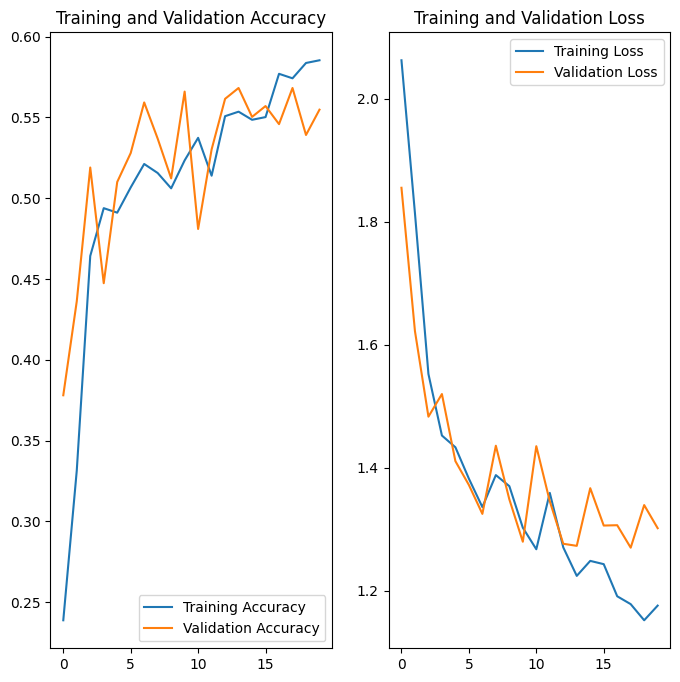

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
print("Training Loss: ", acc)
print("Validation Loss: ", val_acc)
print("Training Loss: ", loss)
print("Validation Loss: ", val_loss)

Training Loss:  [0.2388392835855484, 0.3314732015132904, 0.4642857015132904, 0.4938616156578064, 0.4910714328289032, 0.5066964030265808, 0.5212053656578064, 0.515625, 0.5061383843421936, 0.5234375, 0.5373883843421936, 0.5139508843421936, 0.55078125, 0.5535714030265808, 0.5485491156578064, 0.5502232313156128, 0.5770089030265808, 0.57421875, 0.5837053656578064, 0.5853794813156128]
Validation Loss:  [0.37807607650756836, 0.43624159693717957, 0.5190156698226929, 0.44742730259895325, 0.5100671052932739, 0.5279642343521118, 0.5592840909957886, 0.536912739276886, 0.5123042464256287, 0.5659955143928528, 0.48098433017730713, 0.5302013158798218, 0.5615212321281433, 0.5682326555252075, 0.5503355860710144, 0.5570470094680786, 0.5458613038063049, 0.5682326555252075, 0.5391498804092407, 0.5548098683357239]
Training Loss:  [2.0624725818634033, 1.8139804601669312, 1.5526090860366821, 1.4526007175445557, 1.4335062503814697, 1.3824959993362427, 1.3363301753997803, 1.3882920742034912, 1.3703333139419556,

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# Training Metrics:

- Accuracy: Training accuracy starts at approximately 23.88% and steadily increases to 58.54%.
- Loss: Training loss decreases from approximately 2.06 to 1.18.

# Validation Metrics:

- Accuracy: Validation accuracy starts at approximately 37.81% and reaches up to 56.82%, showing improvements but with fluctuations.
- Loss: Validation loss decreases from approximately 1.85 to 1.30, indicating overall improvement but with some variability.

# Observations on Overfitting:
- ### Training vs. Validation Accuracy:

  - Both training and validation accuracies show improvement, but the validation accuracy fluctuates, indicating some instability.
  - The gap between training and validation accuracies is smaller compared to the previous observations, suggesting reduced overfitting but still present.

- ### Training vs. Validation Loss:

  - Both training and validation losses decrease, but the validation loss shows more fluctuation.
  - The decreasing trend in validation loss with occasional spikes suggests the model is learning but still overfits at times.

# Let's try few improvement strategies:

1. Let's adjust Early Stopping Parameter "Patience" to 10 epochs to allow more epochs for potential convergence before stopping.
2. Lets add more augmentation techniques such as RandomTranslation and RandomContrast to further diversify training data.
3. Lets add more dropout layers by introducing additional dropout layer between dense layers with slightly reduced dropout rate of 0.3 to prevent too many neurons to be dropped
4. Let's implement learning rate scheduling to reduce the learning rate as training progresses, which can help in stabilizing learning towards the end of training.
5. Let's add another convolutional layer or increasing the number of filters gradually

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/dataset"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## make a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names

num_classes = len(train_ds.class_names)

print(class_names, num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 9


In [10]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

# Let's add Data augmentation layer - Data augmentation artificially expands the training dataset by creating modified versions of images. It helps in:
# Reducing Overfitting: By making the model less sensitive to small variations in the input images.
# Improving Generalization: By exposing the model to a wider range of possible image variations.
# Enhancing Robustness: By training the model to recognize objects regardless of orientation, position, and scale.
# Data augmentation layer

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
])


In [12]:

# Build the CNN model with additional dropout and data augmentation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.4),  # Adjusted Dropout rate
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Additional Dropout layer
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

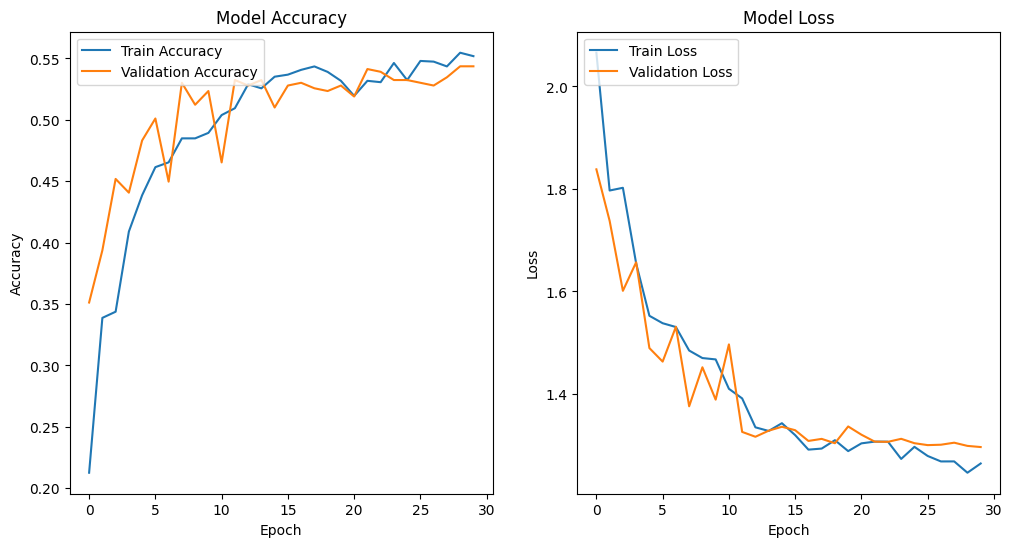

In [13]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [2]:
## Your code goes here.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/dataset"

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

batch_size = 32
img_height = 180
img_width = 180
seed = 123

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## make a test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names

num_classes = len(train_ds.class_names)

# Initialize a Counter to count occurrences of each class
class_count = Counter()

print(class_names, num_classes, class_count)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 9 Counter()


In [11]:
# Iterate over the dataset and count each class
for images, labels in train_ds:
    class_count.update(labels.numpy())

In [12]:
# Map class indices to class names
class_distribution = {class_names[i]: count for i, count in class_count.items()}


In [13]:
# Print the class distribution
print("Class Distribution in Training Dataset:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")


Class Distribution in Training Dataset:
vascular lesion: 115
nevus: 277
pigmented benign keratosis: 370
melanoma: 352
dermatofibroma: 77
actinic keratosis: 92
basal cell carcinoma: 309
squamous cell carcinoma: 142
seborrheic keratosis: 58


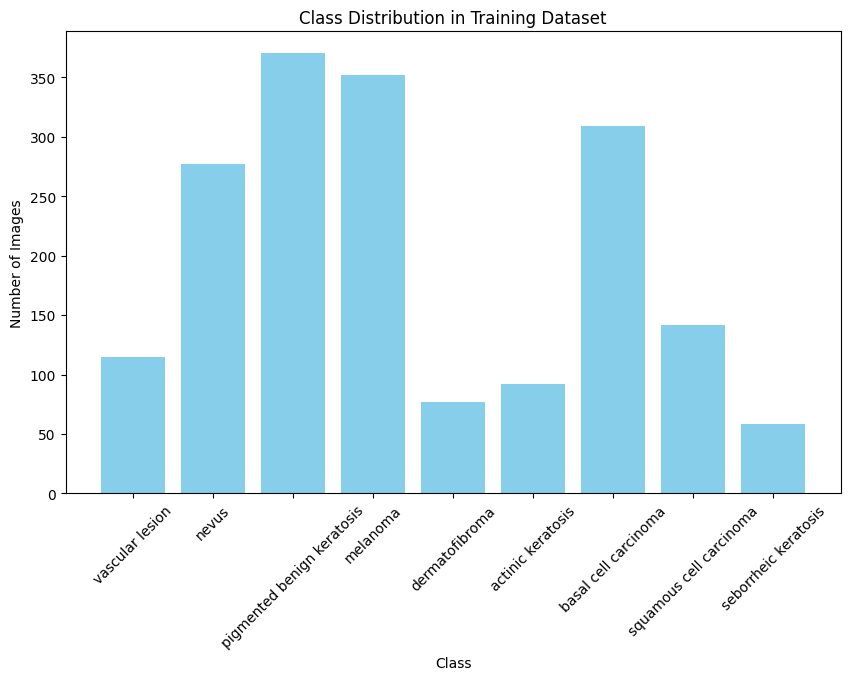

In [14]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
    - Seborrheic Keratosis: This class has the fewest samples, with only 58 images. This class is underrepresented, which may cause the model to perform poorly on this class due to insufficient data for learning distinctive features.
#### - Which classes dominate the data in terms proportionate number of samples?
    - Pigmented Benign Keratosis: This class has the highest number of samples, with 370 images.
    - Melanoma: The second most represented class, with 352 images.
    - Nevus: The third most represented class, with 277 images.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip -q "/content/gdrive/My Drive/CNN_assignment.zip" -d "/content/dataset"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
# Define class names
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
               'melanoma', 'nevus', 'pigmented benign keratosis',
               'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

In [6]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [7]:
# Augment data using Augmentor
import Augmentor
for class_name in class_names:
    class_dir = os.path.join(data_dir_train, class_name)
    p = Augmentor.Pipeline(class_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C6CFB5B2740>: 100%|██████████| 500/500 [00:18<00:00, 27.54 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C6CFBDF3CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C6CF84236A0>: 100%|██████████| 500/500 [00:22<00:00, 22.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C6CFB582CB0>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C6CFBDF2EF0>: 100%|██████████| 500/500 [01:16<00:00,  6.52 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C6CF8447DC0>: 100%|██████████| 500/500 [00:15<00:00, 32.36 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C6CFBDF3550>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C6CFB4C7E20>: 100%|██████████| 500/500 [00:15<00:00, 31.35 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C6CF8458490>: 100%|██████████| 500/500 [00:15<00:00, 31.51 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [8]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [9]:
# Create a DataFrame with new image paths and labels
import glob

# Get list of all augmented image paths
import os
augmented_image_paths = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))



In [10]:
# Extract class labels from paths
augmented_labels = [os.path.basename(os.path.dirname(os.path.dirname(path))) for path in augmented_image_paths]



In [11]:
# Create a DataFrame
df_augmented = pd.DataFrame(list(zip(augmented_image_paths, augmented_labels)), columns=['Path', 'Label'])


In [12]:

# Verify class distribution after augmentation
print(df_augmented['Label'].value_counts())



Label
dermatofibroma                500
melanoma                      500
seborrheic keratosis          500
basal cell carcinoma          500
actinic keratosis             500
pigmented benign keratosis    500
nevus                         500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64


In [13]:
# Define parameters for the dataset
batch_size = 32
img_height = 180
img_width = 180
seed = 123



In [14]:
# Create a combined dataset including original and augmented images
# Define a function to preprocess image paths
def preprocess_path(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img /= 255.0  # Normalize to [0,1]
    return img, label



In [15]:
# Create dataset from the DataFrame
file_paths = df_augmented['Path'].values
labels = df_augmented['Label'].values



So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [16]:
# Encode labels
label_to_index = {name: index for index, name in enumerate(class_names)}
index_to_label = {index: name for name, index in label_to_index.items()}
labels = [label_to_index[label] for label in labels]



#### **Todo:** Create a training dataset

In [17]:
# Create a TensorFlow dataset
path_ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
image_label_ds = path_ds.map(preprocess_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)



#### **Todo:** Create a validation dataset

In [18]:
# Split dataset into training and validation
train_size = int(0.8 * len(image_label_ds))
train_ds = image_label_ds.take(train_size)
val_ds = image_label_ds.skip(train_size)



#### **Todo:** Create your model (make sure to include normalization)

In [19]:
# Batch and prefetch the dataset
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [20]:
# Define the CNN model with dropout and data augmentation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [22]:
# Define early stopping and learning rate reduction callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs #,
    # callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
113/113 [==============================] - 43s 302ms/step - loss: 6.3941 - accuracy: 0.5119 - val_loss: 3.1748 - val_accuracy: 0.0000e+00
Epoch 2/50
113/113 [==============================] - 22s 198ms/step - loss: 2.4215 - accuracy: 0.4186 - val_loss: 2.3036 - val_accuracy: 0.0000e+00
Epoch 3/50
113/113 [==============================] - 20s 181ms/step - loss: 2.3748 - accuracy: 0.2225 - val_loss: 2.4166 - val_accuracy: 0.0000e+00
Epoch 4/50
113/113 [==============================] - 23s 201ms/step - loss: 2.1664 - accuracy: 0.0511 - val_loss: 2.5704 - val_accuracy: 0.0000e+00
Epoch 5/50
113/113 [==============================] - 23s 202ms/step - loss: 2.1418 - accuracy: 0.0522 - val_loss: 2.7317 - val_accuracy: 0.0000e+00
Epoch 6/50
113/113 [==============================] - 23s 204ms/step - loss: 2.1722 - accuracy: 0.1353 - val_loss: 2.8792 - val_accuracy: 0.0000e+00
Epoch 7/50
113/113 [==============================] - 20s 181ms/step - loss: 2.1862 - accuracy: 0.2539 - v

#### **Todo:**  Visualize the model results

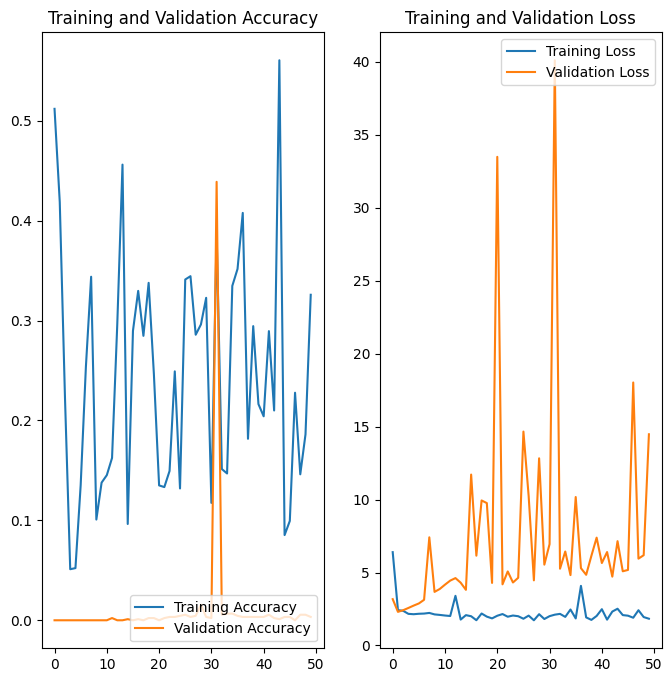

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

# **Analysis of result:*
1. **Training loss and accuracy:**
   - **Accuracy**: The training accuracy is relatively low and fluctuates, with values ranging from 5.11% to 56.05%.
   - **Loss**: The training loss decreases over time but remains high, indicating that the model is struggling to learn effectively from the training data.
2. **Validation Accuracy and Loss**:
   - **Accuracy**: The validation accuracy is very low, starting from 0% and occasionally peaking at 43.88%, with many epochs showing near-zero accuracy.
   - **Loss**: The validation loss is extremely high, with significant fluctuations, suggesting the model is not generalizing well to the validation set.

### Evidence of Underfitting and Overfitting

- **Underfitting**:
  - The model shows low training accuracy and high training loss, which is a sign of underfitting. This means the model is not learning the training data well enough.

- **Overfitting**:
  - Despite the augmentation efforts, the validation accuracy is very low and the validation loss is very high, indicating that the model may also be overfitting to the training data. This is evidenced by the significant gap between training and validation metrics.

### Let's try few Strategies to Improve Accuracy and Address Class Imbalance

1. **Enhance Data Augmentation**:
   - Let's use a broader range of augmentation techniques such as `RandomBrightness`, `RandomContrast`, `RandomShear`, and `RandomZoom` to increase the diversity of the training set.

2. **Increase Model Complexity**:
   - Add more convolutional and dense layers to the model to better capture complex patterns in the data.

3. **Class Weighting**:
   - Adjust the class weights in the loss function to give more importance to underrepresented classes.

4. **Learning Rate Adjustment**:
   - Use learning rate scheduling to adjust the learning rate dynamically during training.

5. **Early Stopping**:
   - Implement early stopping with a higher patience value to prevent premature stopping.